# Exploratory Data Analysis: Multiple Variables (Advanced)

### Intro and objectives:

#### Conduct your first data science project

### In this lab you will learn:
1.  How to investigate a given research question using exploratory data analysis techniques

# Will you survive the Titanic Voyage ?

## In this lab we need to investigate which factors play a role in the chances of surviving the Titanic Voyage.
### We will do so by using the methods and techniques we have learned in previous sessions

### In module M4DS102 you will learn how to fit predictive models which, given the characteristics of a passenger, will determine the odds of survival.

# Context of the problem

### The sinking of the Titanic is one of the most infamous shipwrecks in history.

### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.



### In this challenge, we ask you to carry out an analysis  that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# 0. Let's import required libraries and load the data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanicData=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Maths4DS101/main/data/titanic_train.csv')

In [3]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Dictionary
<img src='https://editor.analyticsvidhya.com/uploads/41391tit16.png'>

### Variable Notes
#### pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

#### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Which features are available in the dataset?

In [5]:
titanicData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Which features are continuous?
Age and Fare

### Which features are discrete?
All except Age and Fare

In [6]:
titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. Distributions of continuous variables

<Axes: xlabel='Age', ylabel='Count'>

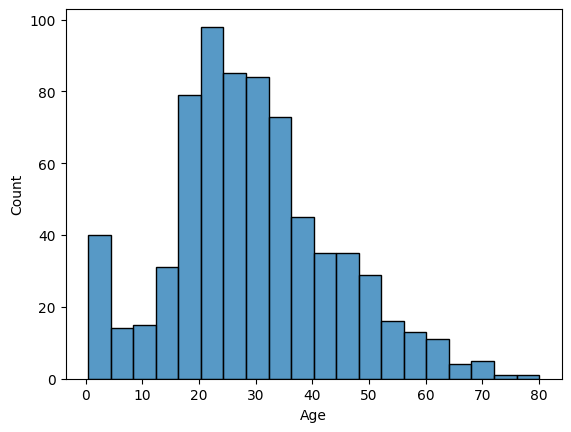

In [7]:
sns.histplot(data=titanicData, x="Age")

<Axes: xlabel='Fare', ylabel='Count'>

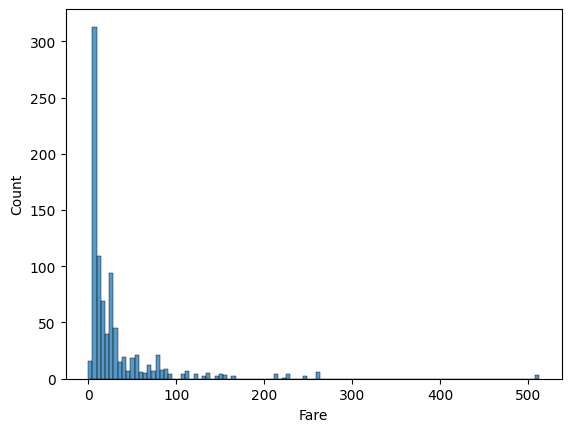

In [8]:
sns.histplot(data=titanicData, x="Fare")

# 2. Distributions of discrete variables

In [9]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


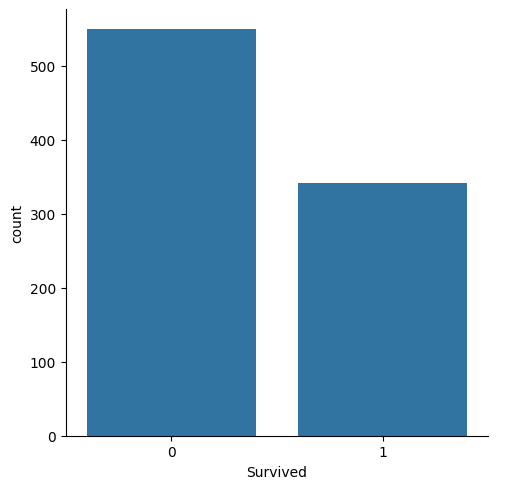

In [10]:
sns.catplot(data=titanicData, x="Survived", kind="count")

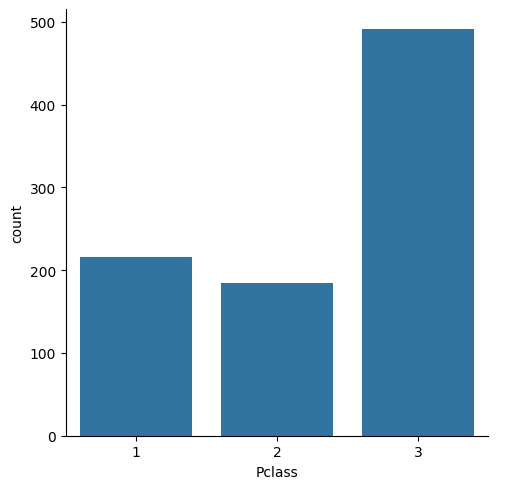

In [11]:
sns.catplot(data=titanicData, x="Pclass", kind="count")

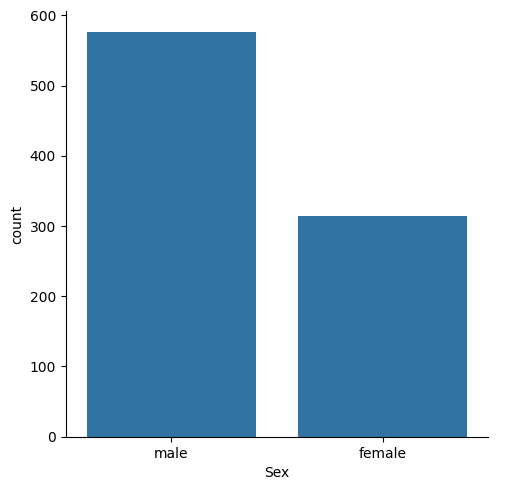

In [12]:
sns.catplot(data=titanicData, x="Sex", kind="count")

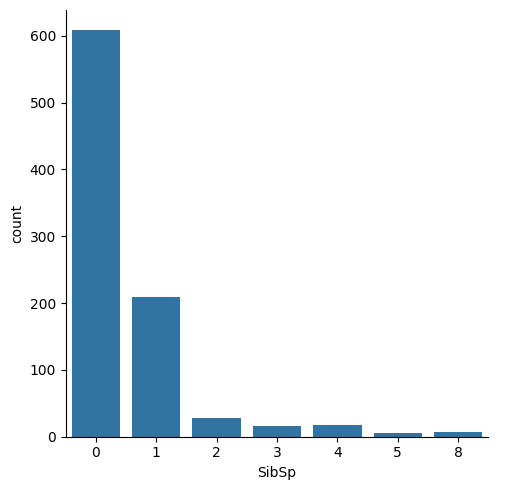

In [13]:
sns.catplot(data=titanicData, x="SibSp", kind="count")



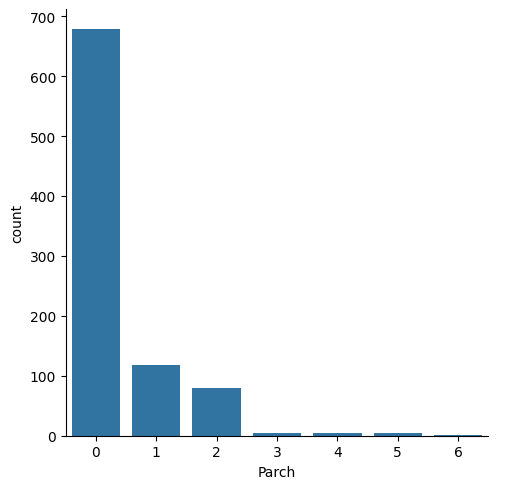

In [14]:
sns.catplot(data=titanicData, x="Parch", kind="count")

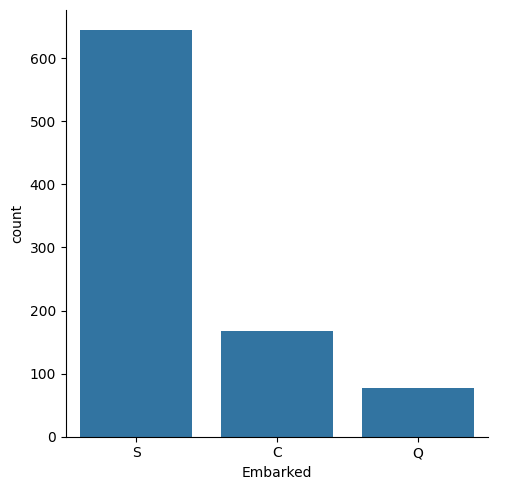

In [15]:
sns.catplot(data=titanicData, x="Embarked", kind="count")

# 2. Contigency Tables

## We can explore how each variable affects chances of survival by way of contingency tables

In [16]:
pd.crosstab(titanicData['Survived'], titanicData['Pclass'],normalize=True)

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


#### We observe from the previous table a large proportion of passengers in third class that did not survived (0.417).
#### We also observe that there is a significant amount of passengers that survived in spite of being in third class (0.1335), were they women or children ??

In [17]:
pd.crosstab(titanicData['Survived'], [titanicData['Pclass'], titanicData['Sex']],normalize=True,margins=False)

Pclass           1                   2                   3         
Sex         female      male    female      male    female     male
Survived                                                           
0         0.003367  0.086420  0.006734  0.102132  0.080808  0.33670
1         0.102132  0.050505  0.078563  0.019080  0.080808  0.05275

In [18]:
pd.crosstab(titanicData['Survived'], titanicData['Sex'],normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


#### Being male reduces the odds of surviving, according to the previous table

# 2. Correlation Matrices

## We can explore how each variable affects chances of survival by way of correlation matrices

In [19]:
# Convert 'Sex' column to numeric representation prior to computing the correlation matrix
titanicData['Gender'] = titanicData['Sex'].map({'male': 0, 'female': 1})

In [20]:
titanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [21]:
titanicData[['Survived','Pclass','Gender','Age','SibSp','Parch','Fare']].corr()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Gender,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


<Axes: >

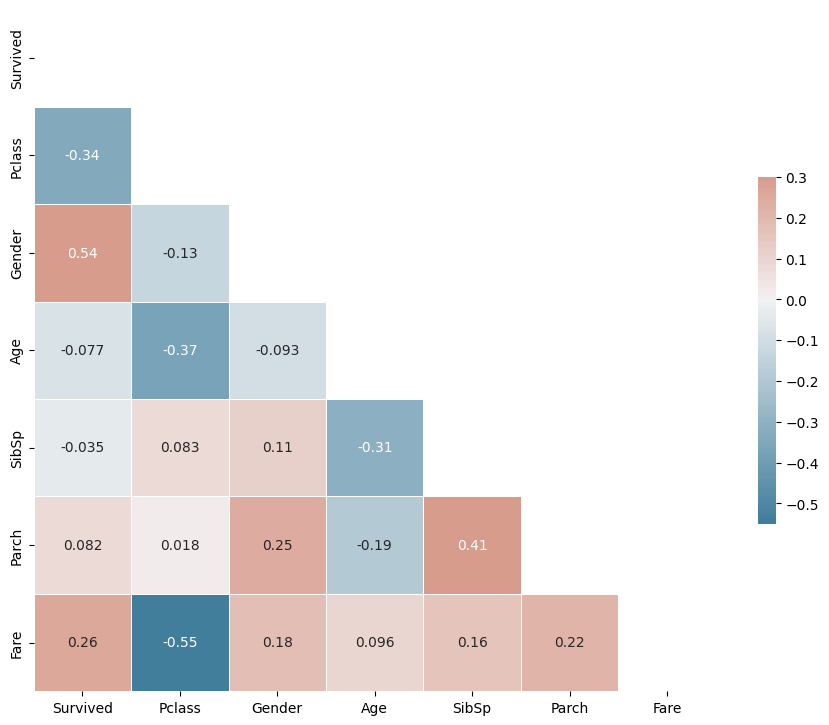

In [22]:
# Compute the correlation matrix
corr = titanicData[['Survived','Pclass','Gender','Age','SibSp','Parch','Fare']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Fare is moderately positively correlated with survivability (0.26), this relationship is also supported by the negative correlation between PClass and survivability (-0.34). Therefore we find evidence that being in a higher class increases the chances of survival !


# 2. ViolinPlots

## We can explore how each variable affects chances of survival using ViolinPlots

<Axes: xlabel='Sex', ylabel='Survived'>

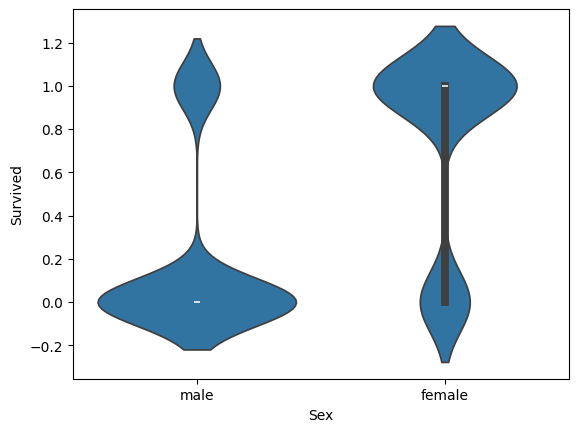

In [23]:
sns.violinplot(data=titanicData, x="Sex", y="Survived")

#### We observe from the previous figure that females stood higher chances of survival !

<Axes: xlabel='Pclass', ylabel='Survived'>

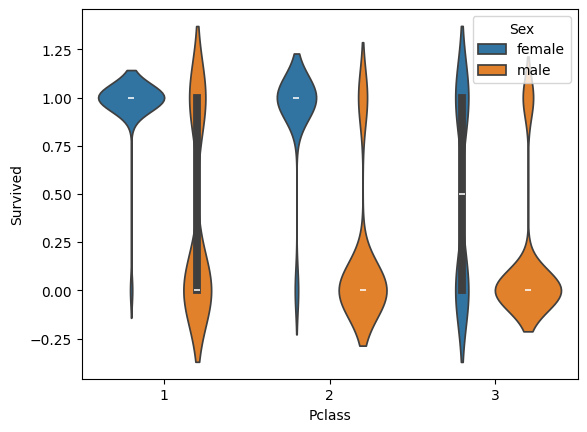

In [24]:
sns.violinplot(data=titanicData, x="Pclass", y="Survived", hue="Sex")

#### We observe a clear effect of Pclass and Gender on survival rates.
#### It is also worth noticing that survival patterns vary accross Passenger Class
